# Explanation of the task

This task is about the image to image translation which is related to translating one image representation or style of the scene to another. There so many application of image to image translation such as low resolution images to high resolution images, from aerial images to google map images, and day images to night or vice versa. For example we can have a low resolution image then we can translate it to a high resolution image. It allows us to remove the compression artifacts and transform the blurred images to sharper images by modifying the pixels. 

We are able to change an image of an already existing design according our taste. For instance we can draw the silhoulette of of an object (shoe, bag, etc.,) and have it translated to a real-looking image. 

The technique of image to image to image translation uses Generative Adversarial Networks (GAN) to translate one image to another.   This network is simply depicted in the below image. (Domain A refers to input images, while Domain A refers to the tegat images in Visidon dataset.) There is a generative network that creates new images, and discriminator network is also used to judge whether these images look natural or not. During this process Generator network learns to draw more realistic images, while discriminator network learns to verify fake images (predicted images) from real ones. 



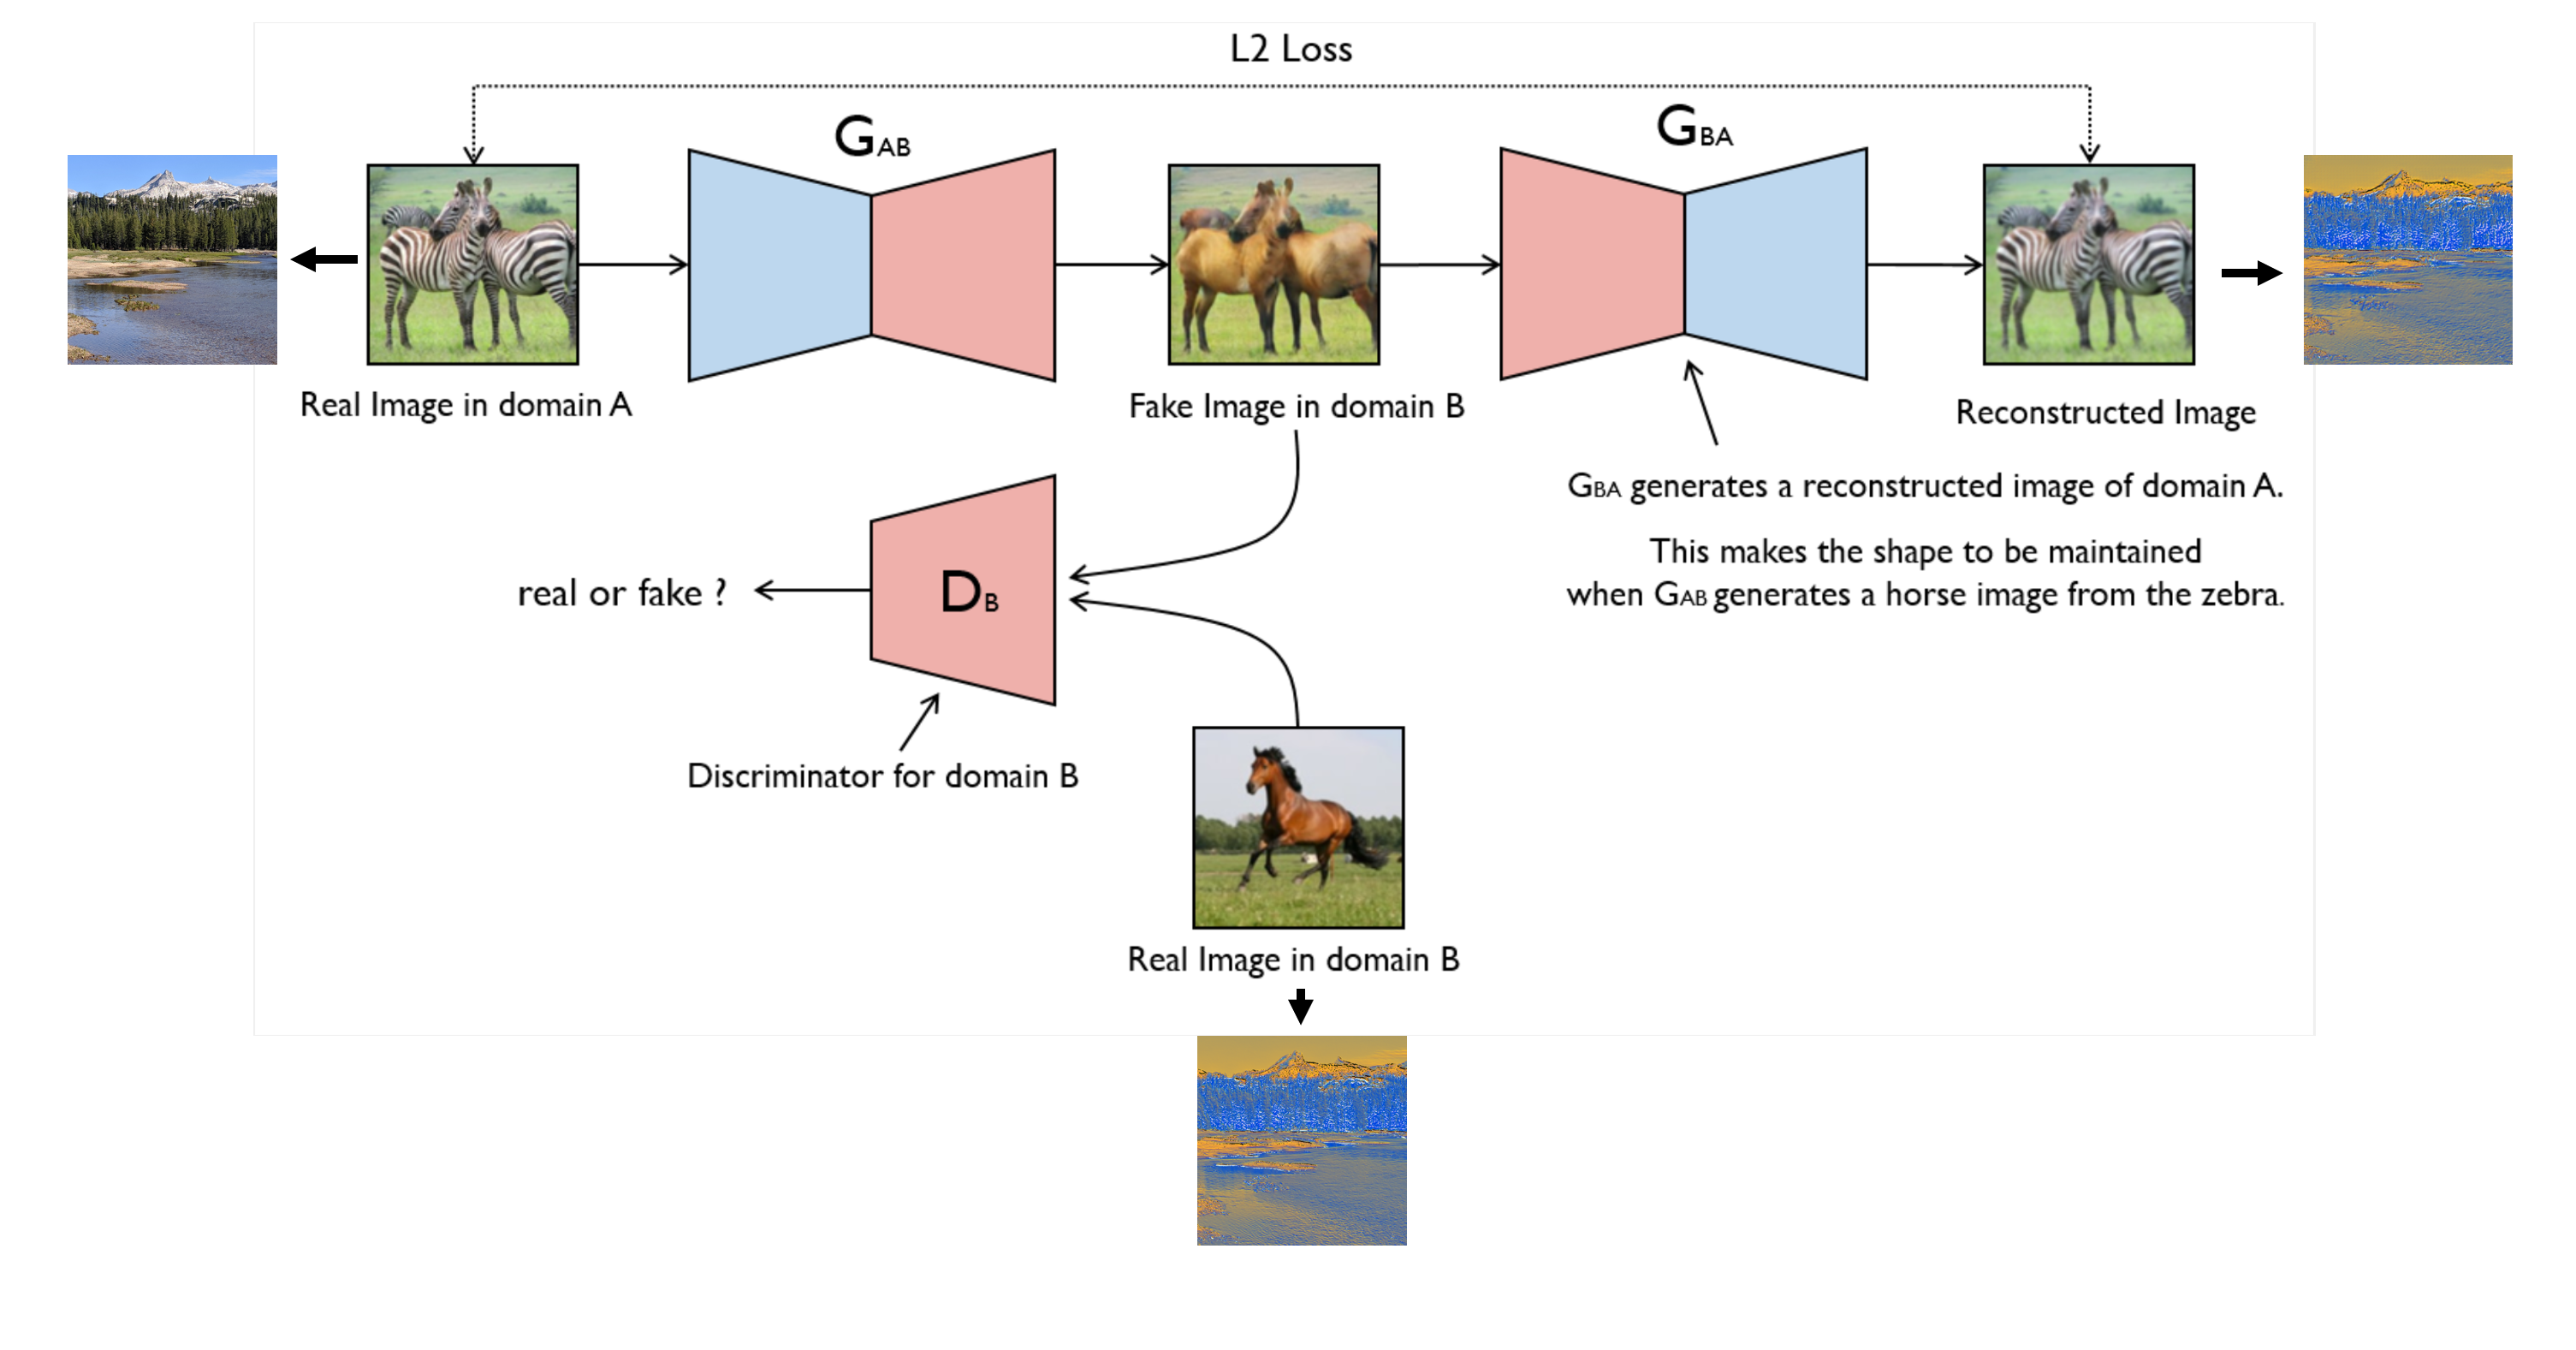

# Requirements


Or use Visidon dataset by creating the appropriate folders and adding in the images.

- torch>=1.4.0 
    - Torch is an open-source machine learning library which is based on Lua scripting language. For my current work i usually used torch to convert numpy based arrays to tensors in order to push them to CUDA.
- torchvision>=0.5.0
    - The torchvision library is usually used for  model architectures, and common image transformation for computer vision
- dominate>=2.4.0
    - Dominate library is used for creating and manipulating HTML which allows user to save results in HTML format. for example in my result folder you can see the results in the HTML format as well. it makes it easy for the reader.
- visdom>=0.1.8.8
    - A flexible tool for creating, organizing, and sharing visualizations of live, rich data
- wandb
    - This library is used  to track machine learning work. such as wandb.config — is used to track hyperparameters 

In [1]:
!pip install -r requirements.txt

# Dataset


Or use Visidon dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (input2target) in the `testA` folder, images you want to transform from b to a (input2target) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

-   For this purpose Cycle GAN model has been trained from scratch. Cycle GAN repo can be seen in this [link](#https://github.com/junyanz/CycleGAN). dataset has been splitted as 80 % as training dataset and 20% as testing dataset. I have used the same training procedure as it was used in the original paper of [Cycle GAN ](https://junyanz.github.io/CycleGAN/). Then pre-trained model is saved.  

In [2]:
import os # used to read multiple images at once
from os.path import join # used to join image folder location and images in the folder in order to read in cv2 
import cv2 # used to read images
import matplotlib.pyplot as plt # used to visualize images. Pillow library can also be used but may need some modification.

C:\Users\mehmeta\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mehmeta\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\mehmeta\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
def read_img(path_to_images):
    img_extensions = ['.jpg', '.jpeg', '.bmp', '.png', '.gif', '.ppm']
    img_files = [f for f in os.listdir(path_to_images) if
                 any(f.endswith(ext) for ext in img_extensions)]
    images = []
    filenames = []
    for n in range(0, len(img_files)):
        my_path1 = os.path.basename(img_files[n])
        (filename, ext) = os.path.splitext(my_path1)
        image = cv2.cvtColor(cv2.imread(join(path_to_images, img_files[n])), cv2.COLOR_BGR2RGB)
        images.append(image)
        filenames.append(filename)

    #images = np.array(images)
    return images, filenames

In [4]:
images, file_name = read_img(r'D:\VD_dataset2\VD_dataset2')

# Input images

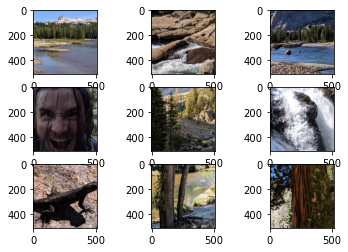

In [5]:

fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(images[cnt])
         cnt += 2

# Target images

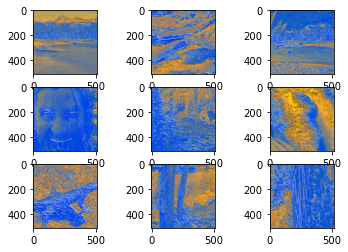

In [6]:
fig, axs = plt.subplots(3, 3)
cnt = [1,3,5,7,9,11,13,15,17]
k = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(images[cnt[k]])
         k +=1

# Pretrained models

- can be found in  .\VD_dataset2\pytorch-CycleGAN-and-pix2pix\content\pytorch-CycleGAN-and-pix2pix\checkpoints\input2target_pretrained_model

# Testing

-   `python test.py --dataroot datasets/input2target/testA --name input2target_pretrained_model --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.


In [7]:
!python test.py --dataroot datasets/input2target/testA --name input2target_pretrained_model --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/input2target/testA   	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

C:\Users\mehmeta\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mehmeta\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\mehmeta\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Result:

Below there are some results are given. 

- the first column refers the images translated from the input images to the target image
- the seconf column refers the input images
- the first column refers the target images 

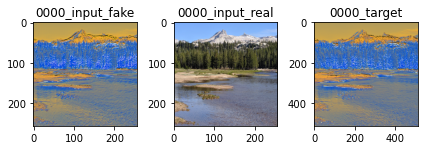

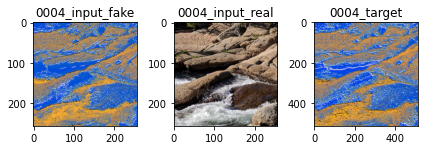

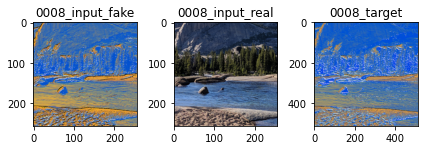

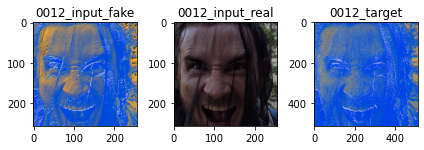

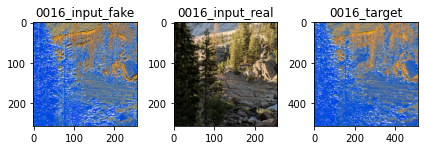

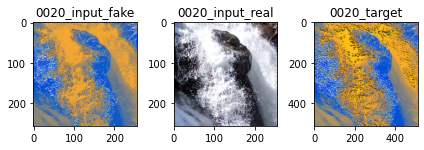

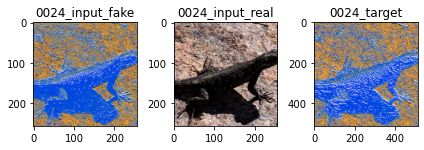

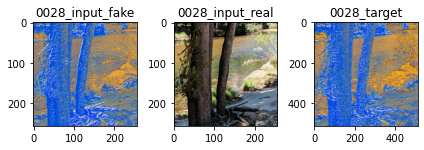

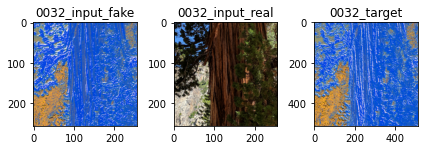

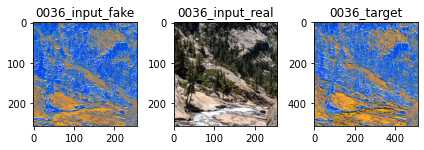

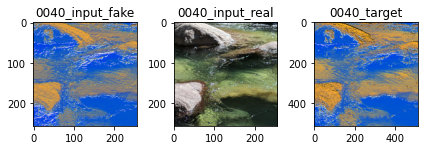

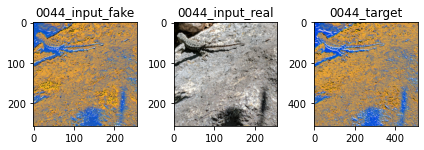

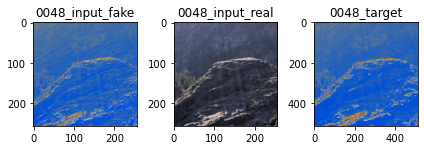

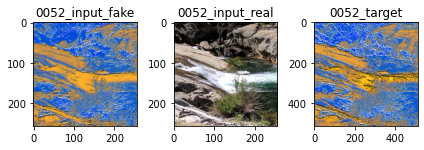

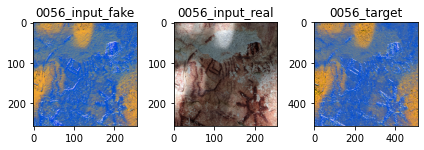

In [8]:
predicetd_images, filenames = read_img(r'C:\Users\mehmeta\Desktop\VD_dataset2\visidon_project\results\input2target_pretrained_model\test_latest\images')
cnt = 0
for i in range(15):
    fig, axs = plt.subplots(1, 3, squeeze=False)
    for i in range(1):
         for j in range(3):
             axs[i, j].imshow(predicetd_images[cnt])
             axs[i, j].set_title(filenames[cnt]) 
             plt.tight_layout ()
             cnt += 1
